<h4> Session 7 </h4>

<h3><i><b>Analysis of CODE4</b></i></h2>
<I>

---


**Target:**

1.   Introduce **Batch Normalization** to increase model's efficiency and help it to converge faster.
Also it provides some regularization.

**Results:**

1.   Parameters: 6288
2.   Best Train Acc: 99.69(last epoch)
3.   Best Test Acc: 99.20(last epoch)
4.   Difference : More train accuracy
5.   Epoch - 15

**Analysis:**


1.   Model again overfits as compared to the last model
2.   Need to introduce dropout to bridge the gap between the train and test accuracy

---


### Imports <hr>

In [1]:
# Pytorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
#!pip install torchsummary
from torchsummary import summary

import sys
sys.path.append('../')

# Loading classes from py files
from model import Net, ModelTraining
from utils import Utility

Class Object Initialization

In [2]:
# creating class objects
get_utilitites= Utility()

model_train = ModelTraining()

##### Check device support CPU/GPU <hr> 

In [3]:
device = Utility.set_cuda_if_available()
print(f'Device available for the script - {device}')

CUDA Available? <function is_available at 0x000001D8F21F3E20>
Device available for the script - cuda


##### Define dataset class for creating train/test loaders <hr>


In [4]:
class Dataset():
    """
    This class defines the train/test transforms for our CNN model for MNIST dataset
    """
    def __init__(self, batch_size):
        
        self.batch_size = batch_size
        self.kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

        self.train_transforms = transforms.Compose([
            # transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
            # transforms.Resize((28, 28)),
            # transforms.RandomRotation((-15., 15.), fill=0),
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,)),
            ])

        # Test data transformations
        self.test_transforms = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,))
            ])

    def train_loader(self):
        train = datasets.MNIST('../data', train=True, download=True, transform=self.train_transforms)
        return torch.utils.data.DataLoader(train, **self.kwargs)

    def test_loader(self):
        test = datasets.MNIST('../data', train=False, download=True, transform=self.test_transforms)
        return torch.utils.data.DataLoader(test, **self.kwargs)

##### Create Batch loader for train/test dataset  <hr>

In [5]:
get_data = Dataset(batch_size=64)

train_loader = get_data.train_loader()
test_loader = get_data.test_loader()

##### View sample images from the train loader  <hr>



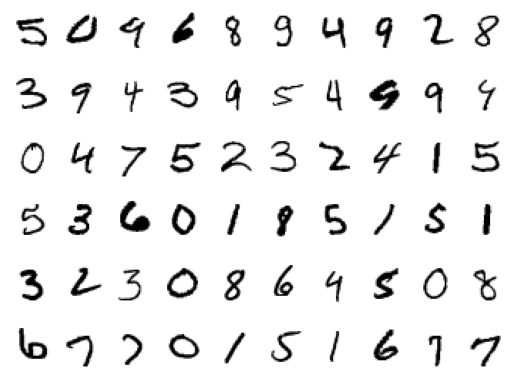

In [6]:
get_utilitites.plot_grid(train_loader)

##### CNN Model summary  <hr>


In [7]:
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              72
              ReLU-2            [-1, 8, 28, 28]               0
       BatchNorm2d-3            [-1, 8, 28, 28]              16
            Conv2d-4           [-1, 10, 26, 26]             720
              ReLU-5           [-1, 10, 26, 26]               0
       BatchNorm2d-6           [-1, 10, 26, 26]              20
            Conv2d-7           [-1, 12, 24, 24]           1,080
              ReLU-8           [-1, 12, 24, 24]               0
       BatchNorm2d-9           [-1, 12, 24, 24]              24
        MaxPool2d-10           [-1, 12, 12, 12]               0
           Conv2d-11            [-1, 8, 12, 12]              96
             ReLU-12            [-1, 8, 12, 12]               0
      BatchNorm2d-13            [-1, 8, 12, 12]              16
           Conv2d-14           [-1, 10,

#### Let's Train and test our model
---


In [8]:
# variable for model and training
num_epochs = 15
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=11, gamma=0.1, verbose=True)

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  model_train.train(model, device, train_loader, optimizer)
  model_train.test(model, device, test_loader)
  #scheduler.step()

Epoch 1


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0442, Accuracy: 9870/10000 (98.70%)

Epoch 2


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0397, Accuracy: 9871/10000 (98.71%)

Epoch 3


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0299, Accuracy: 9902/10000 (99.02%)

Epoch 4


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0291, Accuracy: 9899/10000 (98.99%)

Epoch 5


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0261, Accuracy: 9914/10000 (99.14%)

Epoch 6


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0238, Accuracy: 9916/10000 (99.16%)

Epoch 7


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0218, Accuracy: 9922/10000 (99.22%)

Epoch 8


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0259, Accuracy: 9910/10000 (99.10%)

Epoch 9


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0267, Accuracy: 9907/10000 (99.07%)

Epoch 10


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0221, Accuracy: 9918/10000 (99.18%)

Epoch 11


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0237, Accuracy: 9917/10000 (99.17%)

Epoch 12


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0244, Accuracy: 9919/10000 (99.19%)

Epoch 13


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0227, Accuracy: 9927/10000 (99.27%)

Epoch 14


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0259, Accuracy: 9919/10000 (99.19%)

Epoch 15


  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0238, Accuracy: 9920/10000 (99.20%)



Plot the Loss/Accuracy for Train/Test dataset

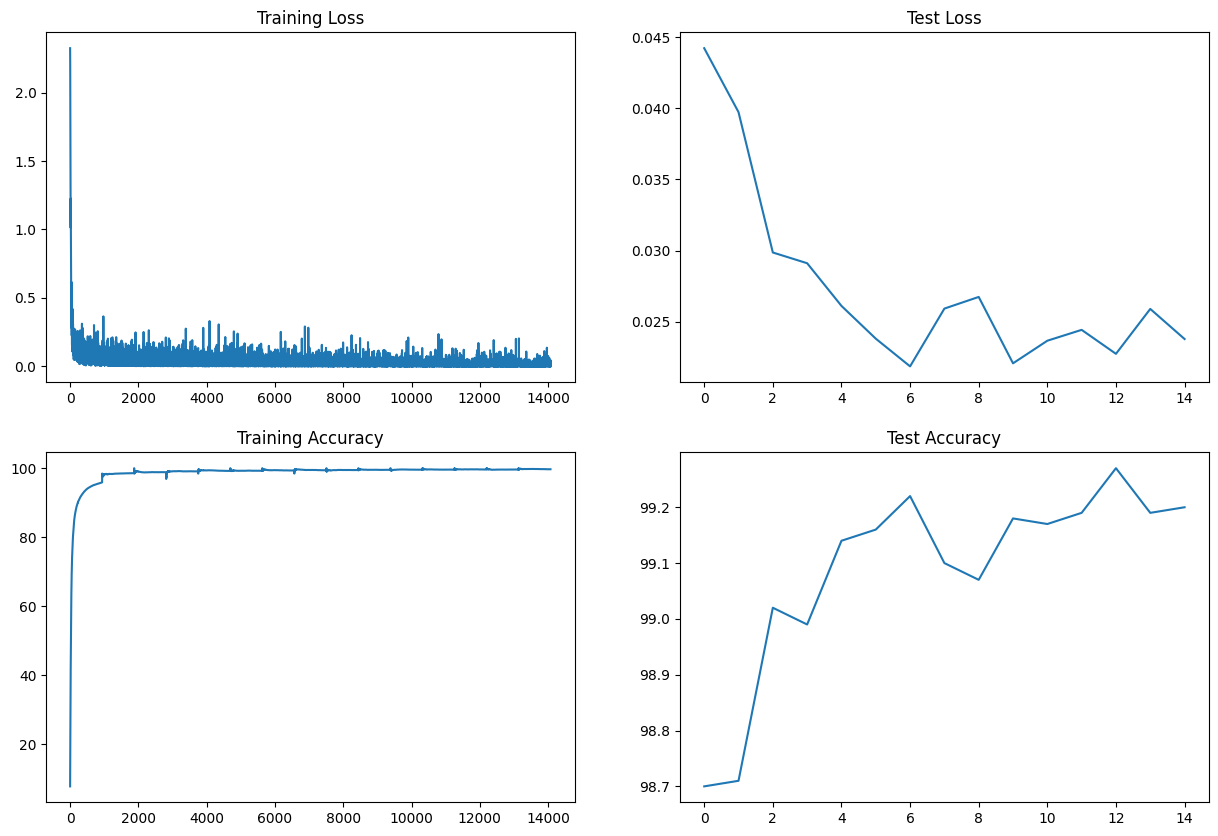

In [9]:
# CODE MOVED TO UTILS.PY

model_train.plot_loss_accuracy()